# Phishing Website Detection by Machine Learning Techniques

## **1. Objective:**
A phishing website is a common social engineering method that mimics trustful uniform resource locators (URLs) and webpages. The objective of this project is to train machine learning models and deep neural nets on the dataset created to predict phishing websites. Both phishing and benign URLs of websites are gathered to form a dataset and from them required URL and website content-based features are extracted. The performance level of each model is measures and compared.

*This project is worked on Google Collaboratory.*<br>
*The required packages for this notebook are imported when needed.*

## **2. Loading Data:**

The features are extracted and store in the csv file. The working of this can be seen in the 'Phishing Website Detection_Feature Extraction.ipynb' file.

The reulted csv file is uploaded to this notebook and stored in the dataframe.

In [333]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [334]:
#Loading the data
data0 = pd.read_csv('urldata.csv')
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,NaN,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,1,0
1,NaN,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,1,0
2,NaN,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,1,0
3,NaN,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,1,0
4,NaN,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,1,0


## **3. Familiarizing with Data**
In this step, few dataframe methods are used to look into the data and its features.

In [336]:
#Checking the shape of the dataset
data0.shape

(10000, 18)

In [337]:
#Listing the features of the dataset
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [338]:
#Information about the dataset
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         5000 non-null   object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

In [339]:
# Remove two columns from the dataset
data0 = data0.drop(['Web_Traffic', 'Right_Click'], axis=1)

## **4. Visualizing the data**
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

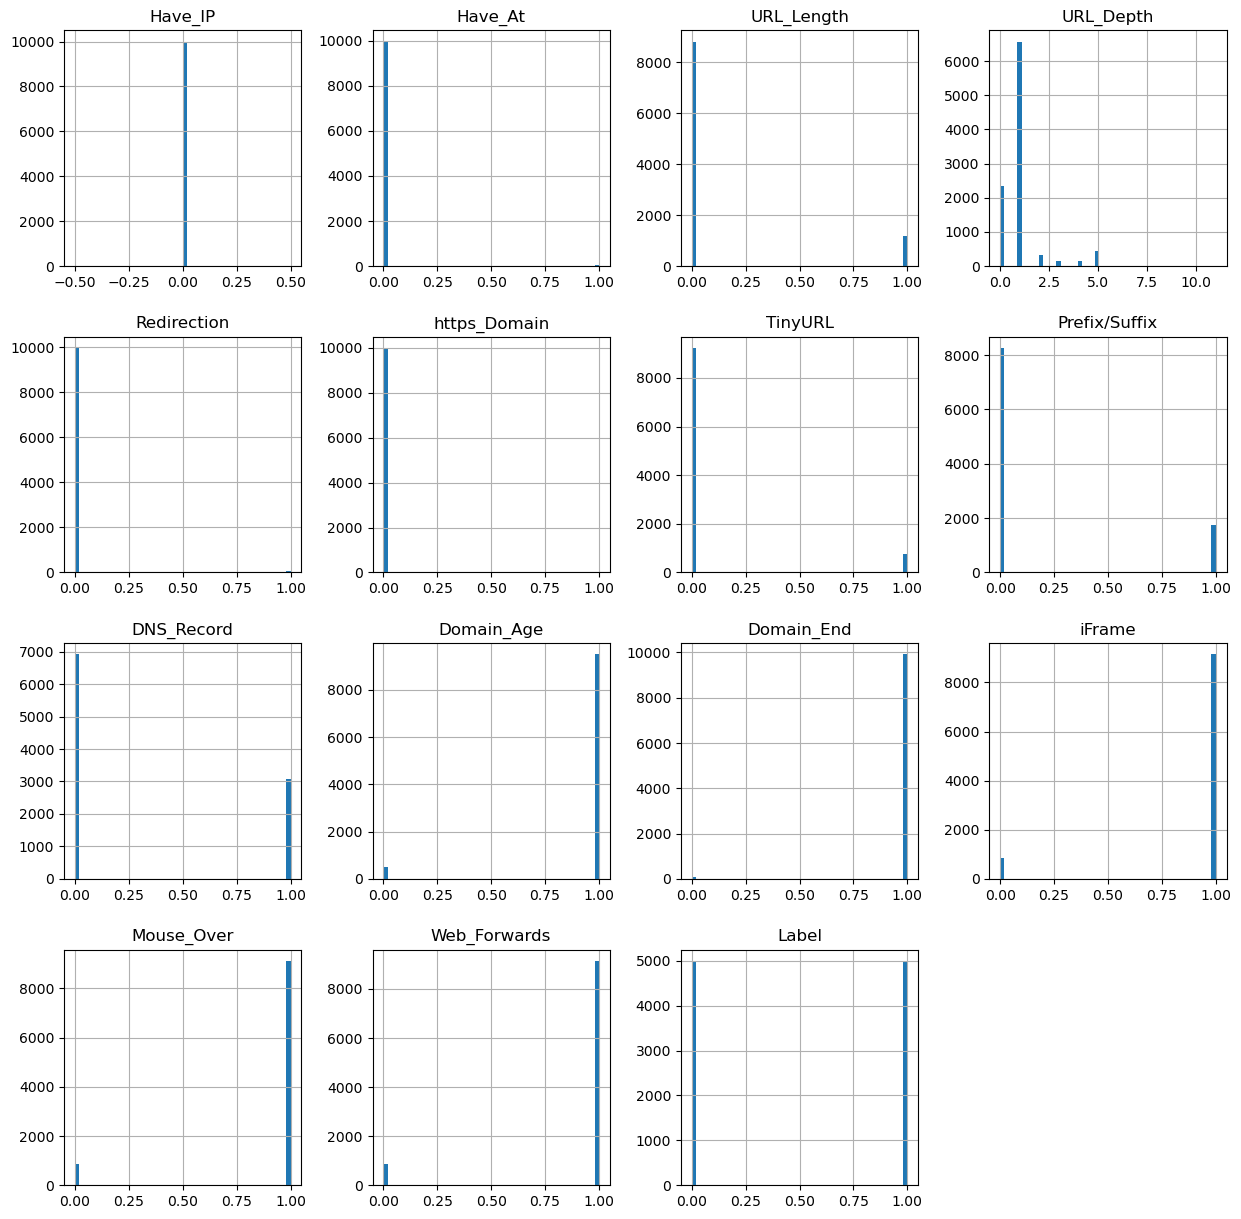

In [341]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

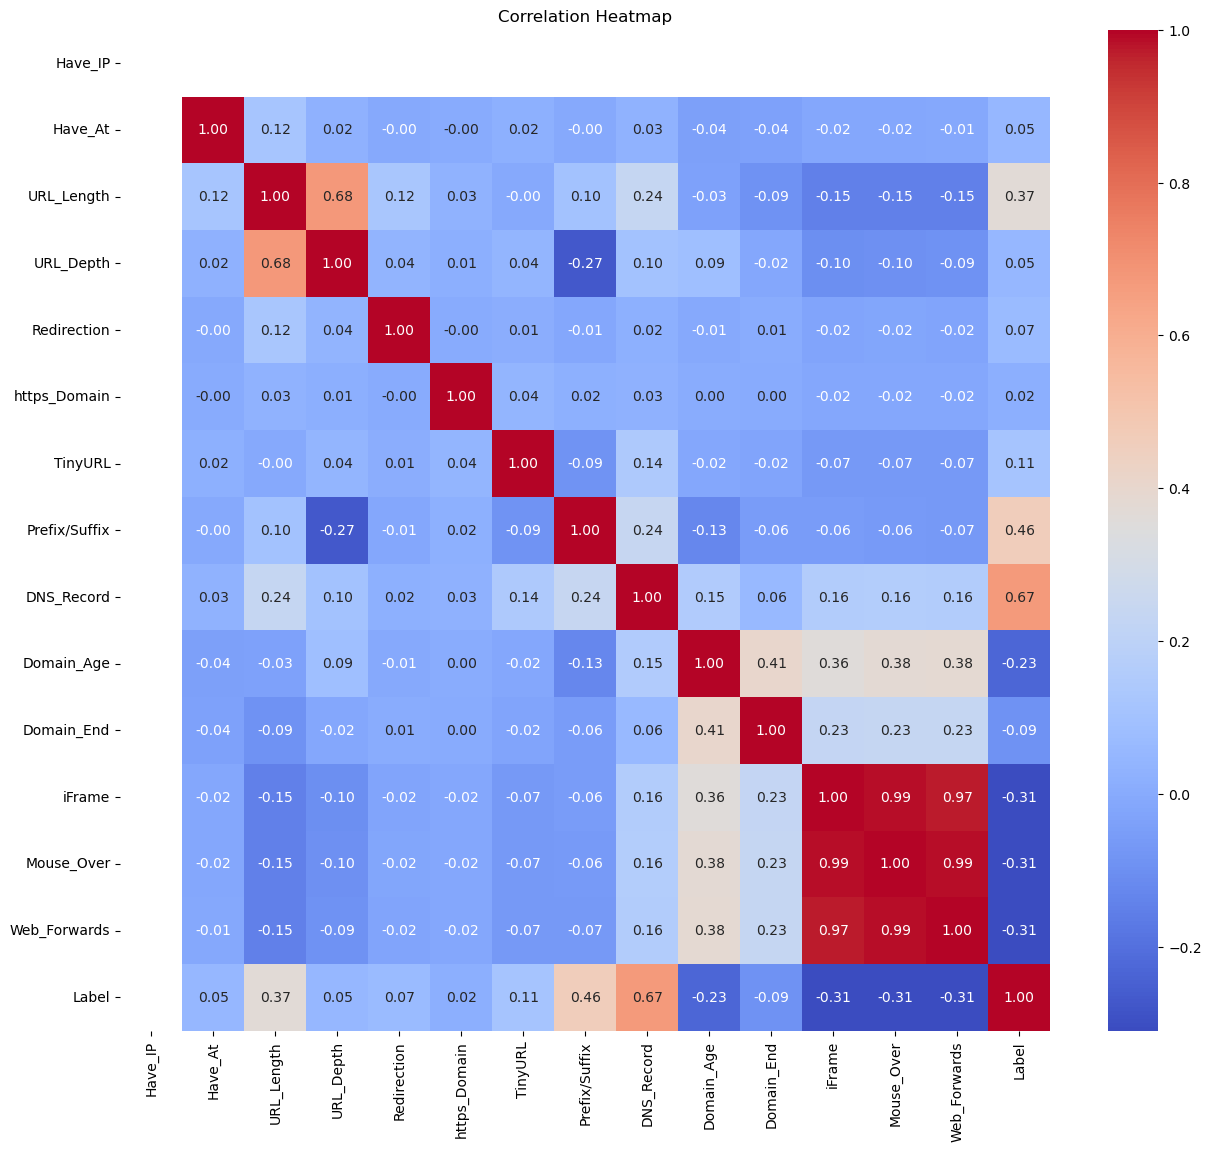

In [342]:
#Correlation heatmap
numeric_data = data0.select_dtypes(include='number') # Only select numeric columns
plt.figure(figsize=(15,13))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


## **5. Data Preprocessing & EDA**
Here, we clean the data by applying data preprocesssing techniques and transform the data to use it in the models.

In [344]:
data0.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End,iFrame,Mouse_Over,Web_Forwards,Label
count,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.0,0.002800,0.118400,1.054800,0.004300,0.000300,0.076900,0.173800,0.308500,0.95050,0.991100,0.914500,0.912300,0.914400,0.500000
std,0.0,0.052844,0.323097,1.096958,0.065437,0.017319,0.266446,0.378956,0.461897,0.21692,0.093924,0.279638,0.282872,0.279786,0.500025
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.500000
75%,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
max,0.0,1.000000,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


The above obtained result shows that the most of the data is made of 0's & 1's except 'Domain' & 'URL_Depth' columns. The Domain column doesnt have any significance to the machine learning model training. So dropping the *'Domain'* column from the dataset. 

In [346]:
#Dropping the Domain column
data = data0.drop(['Domain'], axis = 1).copy()

This leaves us with 16 features & a target column. The *'URL_Depth'* maximum value is 20. According to my understanding, there is no necessity to change this column.

In [348]:
#checking the data for null or missing values
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Web_Forwards     0
Label            0
dtype: int64

In the feature extraction file, the extracted features of legitmate & phishing url datasets are just concatenated without any shuffling. This resulted in top 5000 rows of legitimate url data & bottom 5000 of phishing url data. 

To even out the distribution while splitting the data into training & testing sets, we need to shuffle it. This even evades the case of overfitting while model training.

In [350]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End,iFrame,Mouse_Over,Web_Forwards,Label
0,0,0,0,1,0,0,0,0,0,1,1,1,1,1,0
1,0,0,0,1,0,0,0,0,0,1,1,1,1,1,0
2,0,0,0,1,0,0,0,0,0,1,1,1,1,1,0
3,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
4,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1


From the above execution, it is clear that the data doesnot have any missing values.

By this, the data is throughly preprocessed & is ready for training.

## **6. Splitting the Data**

In [353]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((10000, 14), (10000,))

In [354]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8000, 14), (2000, 14))

## **7. Machine Learning Models & Training**

From the dataset above, it is clear that this is a supervised machine learning task. There are two major types of supervised machine learning problems, called classification and regression. 

This data set comes under classification problem, as the input URL is classified as phishing (1) or legitimate (0). The supervised machine learning models (classification) considered to train the dataset in this notebook are:
* Logestic Regression classifier
* Multi
* Random Forest
* Principal component Analysis

In [356]:
#importing packages
from sklearn.metrics import accuracy_score

In [357]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

## 7.1. Logistic Regression Classifier
Logistic Regression is one of the most widely used algorithms for binary classification tasks. Rather than learning a sequence of if/else decisions like a decision tree, logistic regression learns a mathematical relationship between the input features and the probability of a particular class.

In the machine learning setting, this relationship is modeled using the logistic (sigmoid) function, which outputs values between 0 and 1 — representing probabilities. The algorithm finds the best-fitting line (or hyperplane in higher dimensions) that separates the two classes by minimizing the log loss function.

Unlike tree-based models, logistic regression assumes a linear relationship between the independent variables and the log-odds of the target variable. It is highly interpretable, efficient for linearly separable data, and often serves as a strong baseline model for classification tasks.

In [359]:
# Feature scaling is important for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [360]:
# Instantiate the model
logreg = LogisticRegression(max_iter=500)

# Fit the model
logreg.fit(X_train_scaled, y_train)
logreg.get_params()


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 500,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [361]:
# Predicting the target value from the model for the samples
y_train_logreg = logreg.predict(X_train_scaled)
y_test_logreg = logreg.predict(X_test_scaled)

**Performance Evaluation:**

In [363]:
# Computing the accuracy of the model performance
acc_train_logreg = accuracy_score(y_train, y_train_logreg)
acc_test_logreg = accuracy_score(y_test, y_test_logreg)

print("Logistic Regression: Accuracy on training Data: {:.3f}".format(acc_train_logreg))
print("Logistic Regression: Accuracy on test Data: {:.3f}".format(acc_test_logreg))

Logistic Regression: Accuracy on training Data: 0.981
Logistic Regression: Accuracy on test Data: 0.980


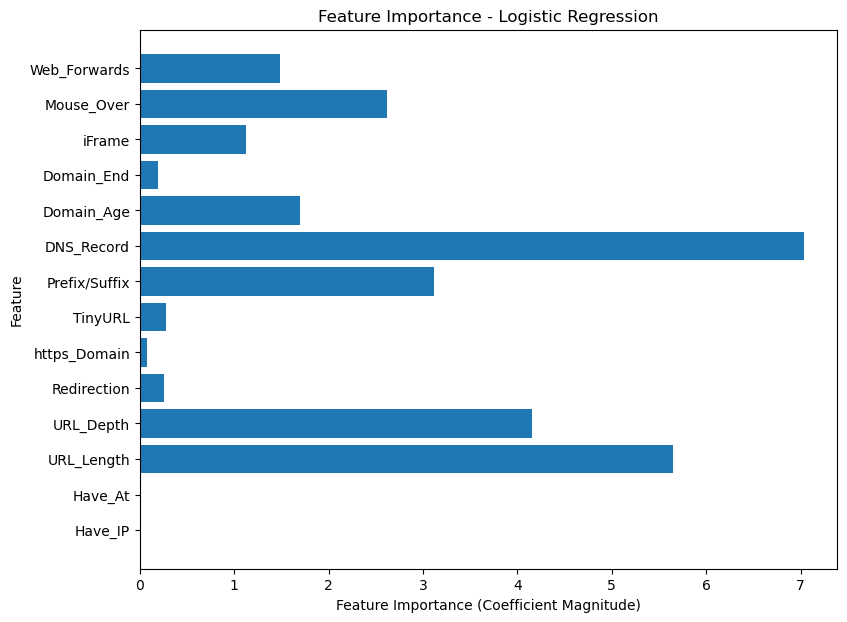

In [364]:
importance = np.abs(logreg.coef_[0])  # for binary classification

# Plotting
plt.figure(figsize=(9, 7))
n_features = X_train.shape[1]
plt.barh(range(n_features), importance, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature Importance (Coefficient Magnitude)")
plt.ylabel("Feature")
plt.title("Feature Importance - Logistic Regression")
plt.show()


**Storing the results:**

In [366]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Logistic Regression', acc_train_logreg, acc_test_logreg)

# 7.2. Multivariate Logistic Regression: 
Classification with Multiple Features
Multivariate Logistic Regression is an extension of simple logistic regression that allows the model to consider multiple independent variables (features) to predict a categorical target variable, typically in binary classification tasks.

Unlike linear models that predict continuous outcomes, logistic regression uses the logit function to model the probability of a class label. When multiple features are involved, the model computes a weighted sum of all input features, applies the sigmoid activation, and outputs the probability of a class label (e.g., 0 or 1).

Multivariate Logistic Regression is a generalization of simple logistic regression, enabling it to capture more complex relationships by considering interactions between features. It’s widely used in domains such as healthcare, finance, and marketing where decision-making depends on multiple factors.

In [440]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

logreg = LogisticRegression(max_iter=1000)

# fit the model
logreg.fit(X_train, y_train)
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [369]:
# Predicting the target value from the model for the samples
y_test_logreg = logreg.predict(X_test)
y_train_logreg = logreg.predict(X_train)

**Performance Evaluation:**

In [371]:
# Computing the accuracy of the model performance
acc_train_logreg = accuracy_score(y_train, y_train_logreg)
acc_test_logreg = accuracy_score(y_test, y_test_logreg)

print("Multivariate Logistic Regression: Accuracy on training Data: {:.3f}".format(acc_train_logreg))
print("Multivariate Logistic Regression: Accuracy on test Data: {:.3f}".format(acc_test_logreg))


Multivariate Logistic Regression: Accuracy on training Data: 0.960
Multivariate Logistic Regression: Accuracy on test Data: 0.954


**Storing the results:**

In [373]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Multivariate Logistic Regression', acc_train_logreg, acc_test_logreg)


## 7.3. Random Forest Classifier
Random forests for regression and classification are currently among the most widely used machine learning methods.A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data.

If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. To build a random forest model, you need to decide on the number of trees to build (the n_estimators parameter of RandomForestRegressor or RandomForestClassifier). They are very powerful, often work well without heavy tuning of the parameters, and don’t require scaling of the data.

In [375]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(X_train, y_train)
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [376]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

**Performance Evaluation:**

In [378]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.981
Random forest: Accuracy on test Data: 0.980


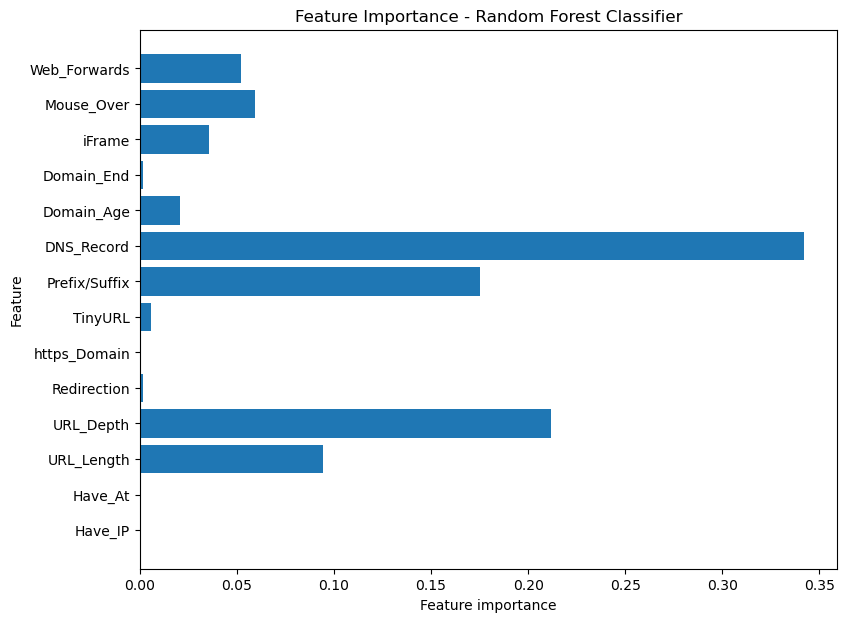

In [436]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.title("Feature Importance - Random Forest Classifier")
plt.show()

**Storing the results:**

In [381]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

## 7.4. Principal Component Analysis (PCA)
Principal Component Analysis (PCA) is a statistical technique used to reduce the dimensionality of a dataset while retaining as much variance as possible. In PCA, the data is transformed into a new coordinate system where the first axis (principal component) represents the direction of maximum variance, the second axis represents the second highest variance, and so on.

PCA is similar to Autoencoders in that both techniques reduce dimensionality, but PCA is a linear method, while Autoencoders use non-linear neural networks.

PCA learns to encode the data into fewer dimensions by finding the directions in which the data varies the most. These directions are called principal components. Like an autoencoder, PCA uses fewer dimensions to represent the original data.

In [383]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


Explained variance ratio: [0.26088197 0.13833305]


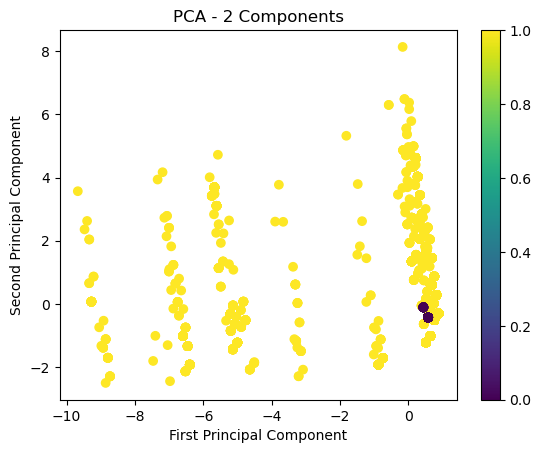

In [384]:

# Standardizing the data (PCA is affected by scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Applying PCA to reduce the dimensions (e.g., 2 components)
pca = PCA(n_components=2)  # You can adjust the number of components here
X_train_pca = pca.fit_transform(X_train_scaled)

# Checking the explained variance ratio to understand the amount of variance captured
print("Explained variance ratio:", pca.explained_variance_ratio_)

# If you want to transform the test data using the same PCA
X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)

# You can visualize the reduced data (if you're using 2 components)
import matplotlib.pyplot as plt
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')  # Color by labels (if available)
plt.title('PCA - 2 Components')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar()
plt.show()


In [385]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applying PCA to reduce dimensions
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio of each component:", explained_variance)

Explained variance ratio of each component: [0.26088197 0.13833305 0.102072   0.08588318 0.08224452 0.07644167
 0.07539146 0.0733949  0.04520247 0.04079678]


**Performance Evaluation:**

In [387]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_pca, y_train)

# Predict on training and test data
y_train_pred = clf.predict(X_train_pca)
y_test_pred = clf.predict(X_test_pca)

# Compute accuracy
acc_train_pca = accuracy_score(y_train, y_train_pred)
acc_test_pca = accuracy_score(y_test, y_test_pred)

print('\nPCA + Logistic Regression: Accuracy on training Data: {:.3f}'.format(acc_train_pca))
print('PCA + Logistic Regression: Accuracy on test Data: {:.3f}'.format(acc_test_pca))


PCA + Logistic Regression: Accuracy on training Data: 0.962
PCA + Logistic Regression: Accuracy on test Data: 0.956


**Storing the results:**

## **8. Comparision of Models**
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [390]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Logistic Regression,0.981,0.980
1,Multivariate Logistic Regression,0.960,0.954
2,Random Forest,0.981,0.980


In [391]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
0,Logistic Regression,0.981,0.980
2,Random Forest,0.981,0.980
1,Multivariate Logistic Regression,0.960,0.954
